Man

In [1]:
import matplotlib.pyplot as plt
import SimpleITK

In [2]:
SimpleITK.__version__

'2.3.1'

In [3]:
#read image inside SimpleITK format
img = SimpleITK.ReadImage("./data/roman.png", SimpleITK.sitkInt8)
img = SimpleITK.Cast(img, SimpleITK.sitkFloat64)

In [4]:
type(img)

SimpleITK.SimpleITK.Image

In [5]:
edge1 = SimpleITK.CannyEdgeDetection(img, lowerThreshold=10, upperThreshold=15, variance= [1, 1])

In [6]:
#convert to numpy array for imshow
edge1 = SimpleITK.GetArrayFromImage(edge1)

In [7]:
type(edge1)

numpy.ndarray

In [8]:
edge1.shape

(640, 960)

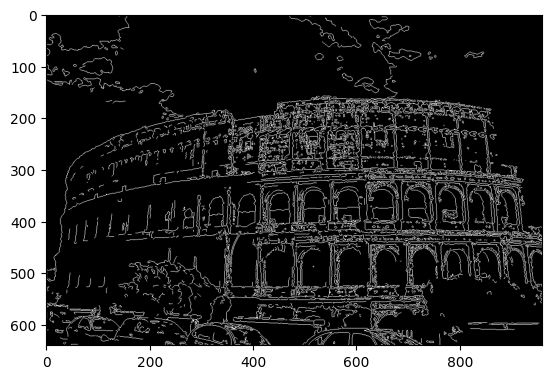

In [9]:
plt.imshow(edge1, cmap="grey")

In [10]:
edge2 = SimpleITK.CannyEdgeDetection(img, lowerThreshold=5, upperThreshold=10, variance= [1, 1])

In [11]:
edge2 = SimpleITK.GetArrayFromImage(edge2)

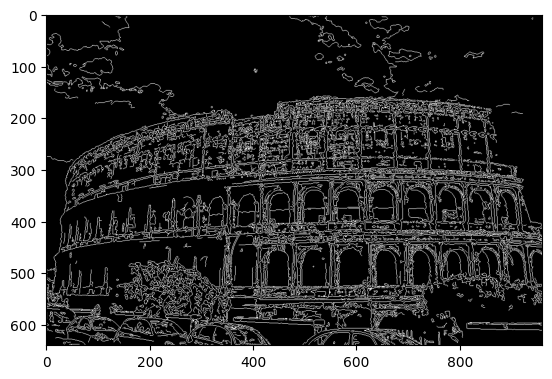

In [12]:
plt.imshow(edge2, cmap="grey")

In [13]:
edge3 = SimpleITK.CannyEdgeDetection(img, lowerThreshold=30, upperThreshold=40, variance= [1, 1])

In [14]:
edge3 = SimpleITK.GetArrayFromImage(edge3)

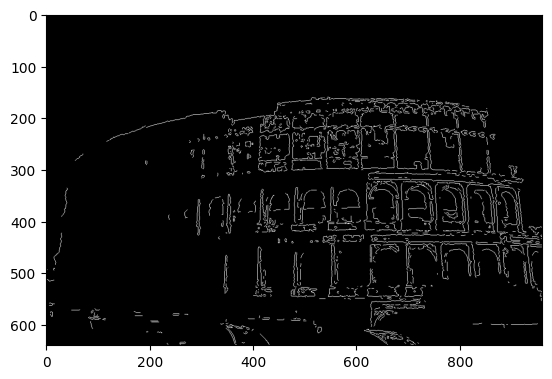

In [15]:
plt.imshow(edge3, cmap="grey")

In [16]:
# apply SimpleITK the same to roman.png

Circle & Zebra

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
rec = cv2.imread("./data/recording.jpg")

In [19]:
rec = cv2.cvtColor(rec, cv2.COLOR_BGR2GRAY)

In [20]:
type(rec)

numpy.ndarray

In [21]:
rec.shape

(851, 1280)

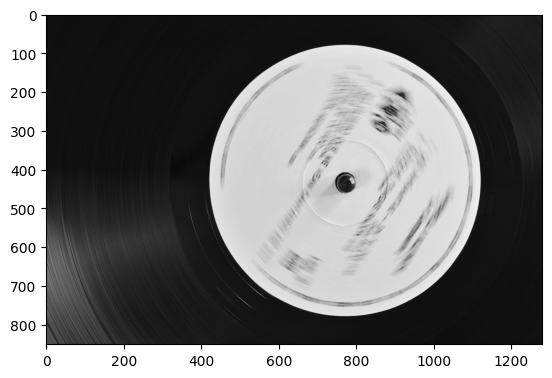

In [22]:
plt.imshow(rec, cmap="gray")

In [23]:
thresh = 150
maxvalue = 255
th, dst = cv2.threshold(rec,thresh,maxvalue,cv2.THRESH_BINARY)

In [24]:
type(th), type(dst)

(float, numpy.ndarray)

In [25]:
th, dst

(150.0,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [26]:
dst.max(),dst.min()

(255, 0)

In [27]:
dst

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [28]:
dst.shape

(851, 1280)

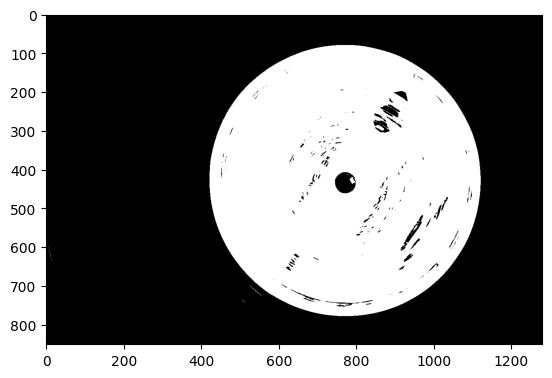

In [29]:
plt.imshow(dst, cmap="gray")

In [30]:
dst.std() #121 --> white

121.2348837541165

In [31]:
zebra = cv2.imread("./data/zebra.jpg")

In [32]:
zebra = cv2.cvtColor(zebra, cv2.COLOR_BGR2GRAY)

In [33]:
zebra.shape

(853, 1280)

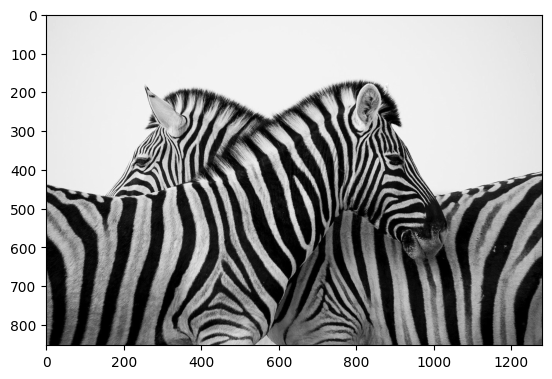

In [34]:
plt.imshow(zebra, cmap="gray")

In [35]:
dst.shape, zebra.shape

((851, 1280), (853, 1280))

In [36]:
dst = cv2.resize(dst, (1280, 800), interpolation=cv2.INTER_LINEAR)
zebra = cv2.resize(zebra, (1280, 800), interpolation=cv2.INTER_LINEAR)

In [37]:
dst.shape, zebra.shape

((800, 1280), (800, 1280))

In [38]:
type(dst), type(zebra)

(numpy.ndarray, numpy.ndarray)

In [39]:
full = np.where(dst, zebra, 0)

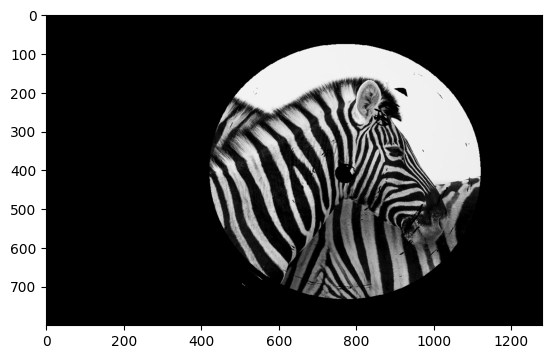

In [40]:
plt.imshow(full, cmap="gray")

In [41]:
full.std()

80.48994027188228

Water Drip

In [42]:
water = cv2.imread("./data/water_drip.jpg")

In [43]:
water.shape

(849, 1280, 3)

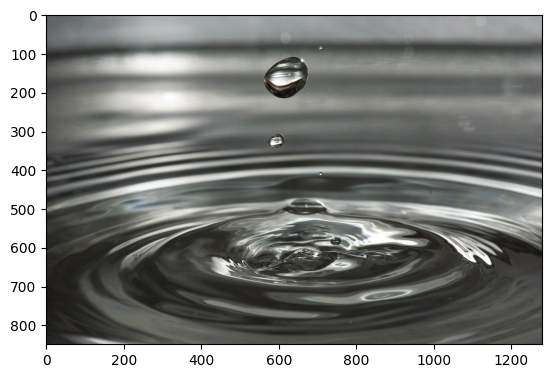

In [44]:
plt.imshow(water[:,:,::-1])

In [45]:
water = cv2.cvtColor(water, cv2.COLOR_BGR2GRAY)

In [46]:
water.shape

(849, 1280)

In [47]:
height, width = water.shape

In [48]:
height 

849

In [49]:
width

1280

In [50]:
tx = 150
ty = 150

Image Translation 

In [51]:
#Translation Array
M = np.float32([[1,0,tx],[0,1,ty]])
new = cv2.warpAffine(water, M, (width, height))

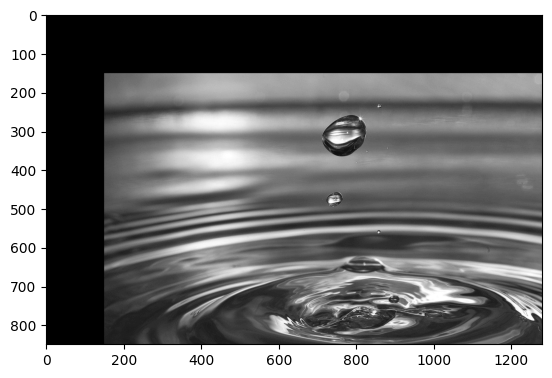

In [52]:
plt.imshow(new, cmap="gray")

Image Rotation

In [53]:
angle = 45
center = (width//2 , height//2)
scale = 2

M = cv2.getRotationMatrix2D(center, angle, scale)
new2 = cv2.warpAffine(water, M, (width, height))

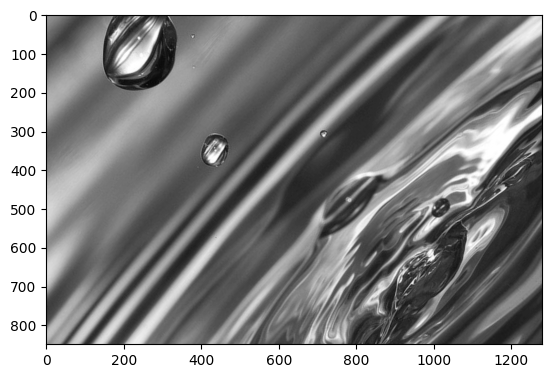

In [54]:
plt.imshow(new2, cmap="gray")

In [55]:
water.shape, new.shape, new2.shape

((849, 1280), (849, 1280), (849, 1280))

Resize

In [56]:
water.shape

(849, 1280)

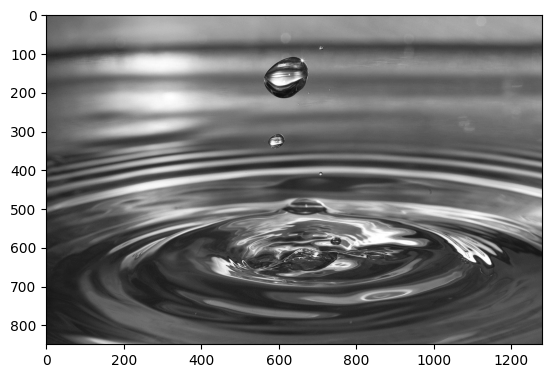

In [57]:
plt.imshow(water, cmap="gray")

In [58]:
resized_img = cv2.resize(water, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

In [59]:
resized_img.shape

(1698, 2560)

In [60]:
(849*2, 1280*2)

(1698, 2560)

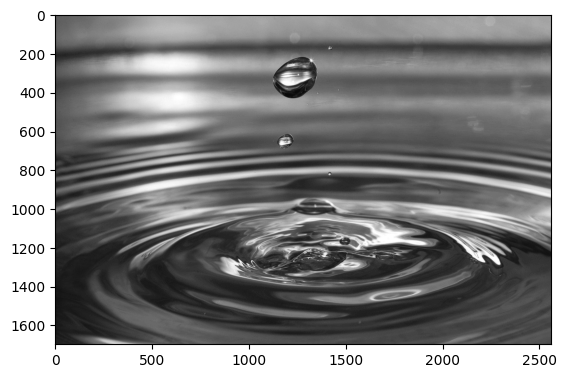

In [61]:
plt.imshow(resized_img, cmap="gray")

Book -> select (crop)

In [62]:
book = cv2.imread("./data/book.jpg")

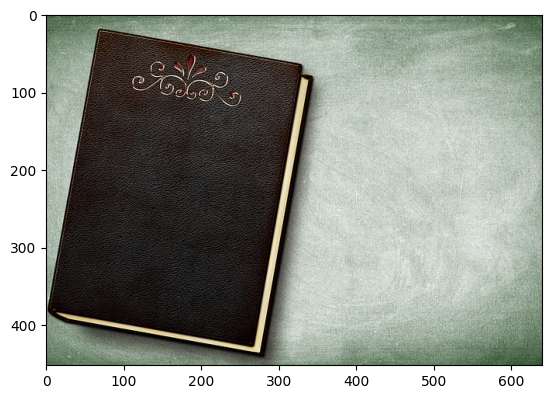

In [63]:
plt.imshow(book[:,:,::-1])

In [64]:
book.shape

(452, 640, 3)

In [65]:
input = np.float32([[4, 380],
                    [265, 425],
                    [325, 70],
                    [70, 25]])

output = np.float32([[0, 300],
                    [300, 300],
                    [300, 0],
                    [0, 0]])

In [66]:
M = cv2.getPerspectiveTransform(input, output)

In [67]:
cover = cv2.warpPerspective(book, M, (300, 300))

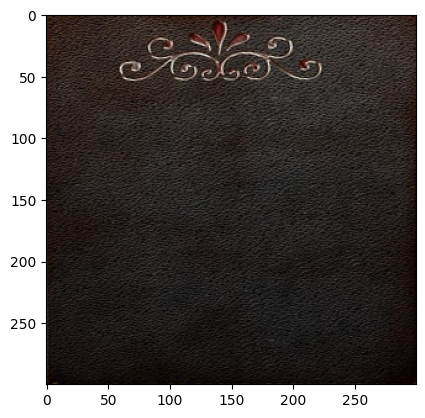

In [68]:
plt.imshow(cover[:,:,::-1])

In [69]:
import cv2

image = cv2.imread("./data/handwritten.png")
copy = image.copy()

In [70]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, bina = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)


In [71]:
cv2.imshow("bin", bina)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
print(cv2.__version__)

4.8.1
